In [50]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [6]:
df = pd.read_csv('../../ml-projects-data/adult.csv', header=None)

In [7]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [32]:
#report = ProfileReport(df)

In [40]:
#report.to_file('salary.html')

#### workclass

In [9]:
df['workclass'] = df['workclass'].str.strip()

In [10]:
df['workclass'] = df['workclass'].replace('?', df['workclass'].mode()[0])

#### occupation

In [13]:
df['occupation'] = df['occupation'].str.strip()

In [15]:
df['occupation'] = df['occupation'].replace('?', df['workclass'].mode()[0])

### Seggrigate Data Types

In [58]:
df['marital_status'] = df['marital_status'].str.strip()
df['marital_status'].replace({
    'Married-civ-spouse': 'couple',
    'Married-AF-spouse':'couple',
    'Married-spouse-absent': 'single',
    'Divorced': 'single',
    'Widowed': 'single',
    'Never-married': 'single',
    'Separated': 'single',
}, inplace=True)

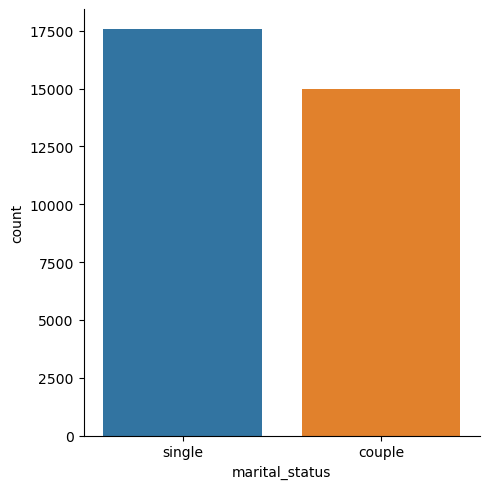

In [59]:
sns.catplot(data=cat_df, x='marital_status', kind='count');

# One Hot

In [72]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [66]:
cat_col = df.select_dtypes(include='object').drop('income', axis=1).columns
num_col = df.select_dtypes(include='number').columns

<AxesSubplot:xlabel='income', ylabel='count'>

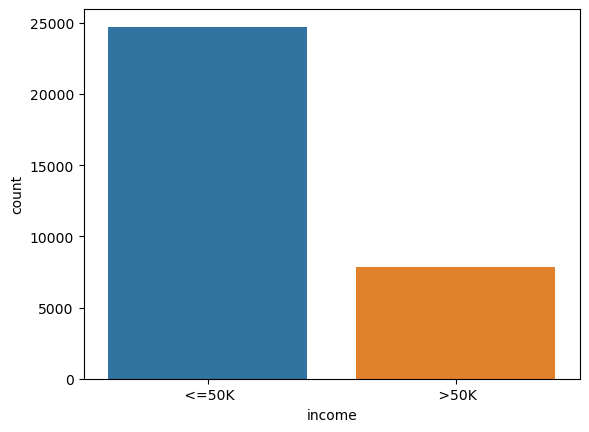

In [73]:
sns.countplot(data=df, x='income')

In [137]:
from imblearn.over_sampling import SMOTE
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [159]:
# pip install xgboost

In [151]:
cat_cols = df.select_dtypes(include='object').drop('income', axis=1).columns
num_cols = df.select_dtypes(include='number').columns

num_steps = [('scaler', StandardScaler())]
num_tarnsformer = Pipeline(steps=num_steps)
cat_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[('num', num_tarnsformer,num_cols),
                 ('cat', cat_transformer, cat_cols)], )

clf = Pipeline([('preprocessor', preprocessor),
                        ('ros', SMOTE()),
                        ('classifier', BernoulliNB())])
X = df.drop('income', axis=1)
y = df['income']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [152]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object'))])),
                ('ros', SMOTE()), ('classifier', BernoulliNB())])

In [153]:
y_pred = clf.predict(X_test)

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.73      0.82      7417
        >50K       0.49      0.85      0.62      2352

    accuracy                           0.75      9769
   macro avg       0.72      0.79      0.72      9769
weighted avg       0.83      0.75      0.77      9769



In [155]:
clf.score(X_train, y_train)

0.7533345033345034

In [156]:
clf.score(X_test, y_test)

0.7541201760671512